In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from tqdm import tqdm
import acd
from copy import deepcopy
sys.path.append('vae')
from model import init_specific_model
from losses import Loss
from dset import get_dataloaders
from training import Trainer
from utils import *
import pickle as pkl
import pandas as pd
import seaborn as sns

In [2]:
out_dir = '/scratch/users/vision/chandan/disentanglement/gaussians/'
dirs = os.listdir(out_dir)
print(dirs)
results = []
for i in range(len(dirs)):
    odir = opj(out_dir, dirs[i])
    fnames = sorted(os.listdir(odir))

    results_list = []
    for fname in fnames:
        if fname[-3:] == 'pkl':
            results_list.append(pkl.load(open(opj(odir, fname), 'rb')))
    results.append(pd.DataFrame(results_list))

['vary_attr']


In [16]:
r = results[0]

In [17]:
r.keys()

Index(['alpha', 'attr', 'attribution_loss', 'batch_size', 'beta',
       'dimensionwise_kl_loss', 'dirname', 'disentanglement_metric', 'eps',
       'gamma', 'hidden_dim', 'kl_normal_loss', 'latent_dim', 'latent_means',
       'latent_vars', 'lr', 'mutual_information', 'net', 'noise_dim',
       'noise_var', 'num_epochs', 'orig_dim', 'out_dir', 'p_batch_size', 'pid',
       'reconstruction_loss', 'seed', 'tc', 'test_batch_size',
       'test_n_samples_per_cluster', 'total_correlation', 'train_batch_size',
       'train_n_samples_per_cluster'],
      dtype='object')

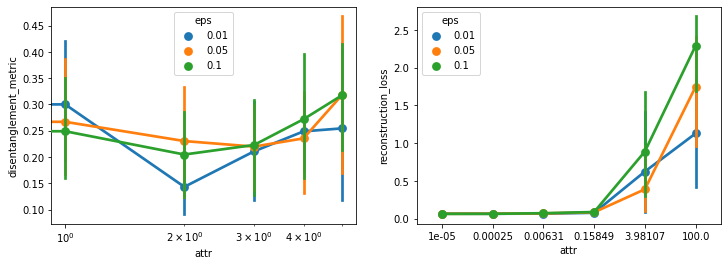

In [46]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# hue = 'hidden_dim'
hue = 'eps'

sns.pointplot(x='attr', y='disentanglement_metric',
                    hue=hue, data=r, label=str(val), ax=ax1)
sns.pointplot(x='attr', y='reconstruction_loss',
                    hue=hue, data=r, label=str(val), ax=ax2)
ax1.set_xscale('log')

In [ ]:
ax0 = sns.pointplot(x='attr', y='kl_normal_loss', hue=None, data=results[0], color='blue')
ax1 = sns.pointplot(x='attr', y='kl_normal_loss', hue=None, data=results[1], color='red')
ax2 = sns.pointplot(x='beta', y='kl_normal_loss', hue=None, data=results[2], color='green')
ax2.set_title('kl penalty')

Text(0.5, 1.0, 'total correlation')

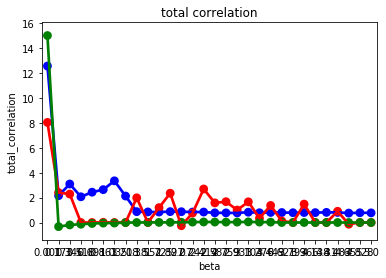

In [61]:
ax0 = sns.pointplot(x='attr', y='total_correlation', hue=None, data=results[0], color='blue')
ax1 = sns.pointplot(x='attr', y='total_correlation', hue=None, data=results[1], color='red')
ax2 = sns.pointplot(x='beta', y='total_correlation', hue=None, data=results[2], color='green')
ax2.set_title('total correlation')

Text(0.5, 1.0, 'mutual information')

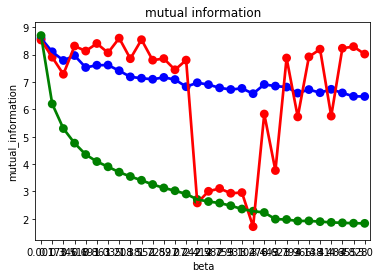

In [62]:
ax0 = sns.pointplot(x='attr', y='mutual_information', hue=None, data=results[0], color='blue')
ax1 = sns.pointplot(x='attr', y='mutual_information', hue=None, data=results[1], color='red')
ax2 = sns.pointplot(x='beta', y='mutual_information', hue=None, data=results[2], color='green')
ax2.set_title('mutual information')

Text(0.5, 1.0, 'dimensionwise kl')

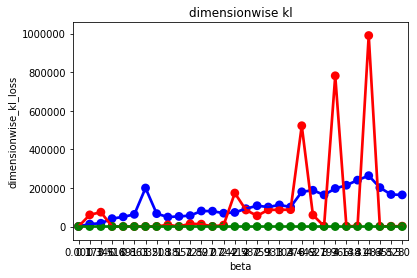

In [63]:
ax0 = sns.pointplot(x='attr', y='dimensionwise_kl_loss', hue=None, data=results[0], color='blue')
ax1 = sns.pointplot(x='attr', y='dimensionwise_kl_loss', hue=None, data=results[1], color='red')
ax2 = sns.pointplot(x='beta', y='dimensionwise_kl_loss', hue=None, data=results[2], color='green')
ax2.set_title('dimensionwise kl')

Text(0.5, 1.0, 'attribution loss')

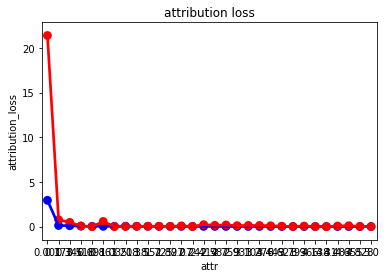

In [64]:
ax0 = sns.pointplot(x='attr', y='attribution_loss', hue=None, data=results[0], color='blue')
ax1 = sns.pointplot(x='attr', y='attribution_loss', hue=None, data=results[1], color='red')
ax1.set_title('attribution loss')